#### Illustration of Goodness of Fit Test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#df = pd.read_csv(r'../../data/cs-training.csv')
df = pd.read_csv('mel_house_price.csv')
df['price'] = np.round(df['Price']/10000, 2)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df = df.fillna(method='ffill')

C:\Users\Vani\AppData\Local\Temp\ipykernel_16224\1226699713.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [3]:
df.head()

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom,Bathroom,Car,...,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price,year_list,month_list,price
0,Burwood,2.0,h,S,Lindellas,11.70,3125.0,1.0,1.0,1.0,...,Monash City Council,-37.851800,145.127800,Southern Metropolitan,5678.0,Parking Pad,1815000,2017,5,181.50
1,Edithvale,4.0,t,PI,Buxton,9.22,3196.0,3.0,1.4,2.0,...,Kingston City Council,-37.804120,144.979946,South-Eastern Metropolitan,2546.0,Carport,955000,2018,3,95.50
2,Tullamarine,2.0,u,SP,Barry,12.90,3043.0,2.6,1.4,1.6,...,Brimbank City Council,-37.648736,144.949798,Western Metropolitan,3296.0,Outdoor Stall,482500,2018,2,48.25
3,St Kilda,2.0,u,VB,hockingstuart,6.10,3182.0,2.0,1.0,1.0,...,Port Phillip City Council,-37.861200,144.985000,Southern Metropolitan,13240.0,Underground,450000,2016,8,45.00
4,Epping,3.0,h,S,Barry,19.60,3076.0,3.0,1.0,2.0,...,Whittlesea City Council,-37.659860,145.032780,Northern Metropolitan,10926.0,Detached Garage,619000,2017,9,61.90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25969 entries, 0 to 25968
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         25969 non-null  object 
 1   Rooms          25969 non-null  float64
 2   Type           25969 non-null  object 
 3   Method         25969 non-null  object 
 4   SellerG        25969 non-null  object 
 5   Distance       25969 non-null  float64
 6   Postcode       25969 non-null  float64
 7   Bedroom        25969 non-null  float64
 8   Bathroom       25969 non-null  float64
 9   Car            25969 non-null  float64
 10  Landsize       25969 non-null  float64
 11  BuildingArea   25969 non-null  float64
 12  YearBuilt      25969 non-null  float64
 13  CouncilArea    25969 non-null  object 
 14  Latitude       25969 non-null  float64
 15  Longtitude     25969 non-null  float64
 16  Regionname     25969 non-null  object 
 17  Propertycount  25969 non-null  float64
 18  Parkin

In [5]:
cols = list(df.select_dtypes(include='object').columns)
for col in cols:
    print(col, df[col].nunique())

Suburb 345
Type 3
Method 5
SellerG 347
CouncilArea 33
Regionname 8
ParkingArea 8


#### H0: A variable has a predetermined distribution.
#### H1: A variable deviates from the expected distribution.

In [7]:
pr = pd.crosstab(df['ParkingArea'], df['Regionname'])
pr

Regionname,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
ParkingArea,,,,,,,,
Attached Garage,551,31,1397,32,246,1343,1008,17
Carport,574,32,1420,36,240,1357,1041,14
Detached Garage,581,28,1404,33,212,1322,1028,14
Indoor,530,31,1263,30,230,1193,963,19
Outdoor Stall,188,11,458,6,78,432,359,8
Parkade,435,19,1050,15,185,1031,748,12
Parking Pad,96,4,216,2,45,228,189,4
Underground,232,9,562,12,99,576,432,8


In [8]:
pr2 = pr.iloc[:,[0,2]]
pr2.columns = ['EM', 'NM']
pr2

,EM,NM
ParkingArea,,
Attached Garage,551,1397
Carport,574,1420
Detached Garage,581,1404
Indoor,530,1263
Outdoor Stall,188,458
Parkade,435,1050
Parking Pad,96,216
Underground,232,562


In [9]:
pr2 = pr2.copy()
pr2['EM_mod'] = np.sum(pr2['NM'])/np.sum(pr2['EM'])*pr2['EM']
pr2

,EM,NM,EM_mod
ParkingArea,,,
Attached Garage,551,1397,1343.354252
Carport,574,1420,1399.428930
Detached Garage,581,1404,1416.495136
Indoor,530,1263,1292.155632
Outdoor Stall,188,458,458.349545
Parkade,435,1050,1060.542830
Parking Pad,96,216,234.050832
Underground,232,562,565.622843


In [10]:
pr2.sum()

EM        3187.0
NM        7770.0
EM_mod    7770.0
dtype: float64

In [11]:
chisquare_stat, p_value = stats.chisquare(pr2['NM'], pr2['EM_mod'])
print('chisquare_stat is : ' + str(chisquare_stat))
print('p_value : ' + str(p_value))

chisquare_stat is : 4.733183602425687
p_value : 0.6924862513090961


Since p-value > α, we accept H0 to conclude that parking are distributions of NM and EM are same.

#### Checking whether price is normally distributed

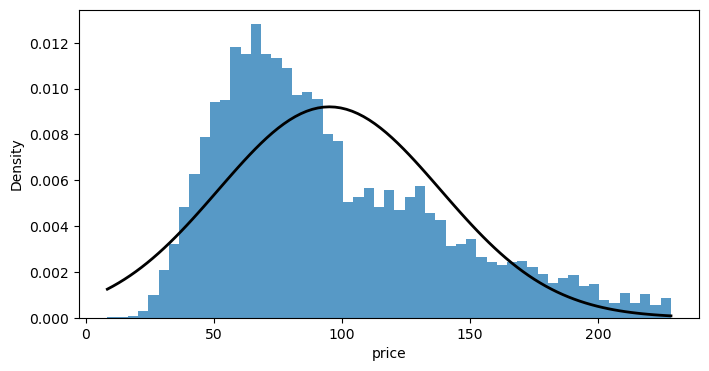

mean:  95.17978705379491 Standard Deviation:  43.339160565650886


In [20]:
plt.figure(figsize=(8,4))
sns.histplot(df['price'],  linewidth=0, stat='density')
mu, std = stats.norm.fit(df['price'])
min = df['price'].min()
max = df['price'].max()
x = np.linspace(min, max, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()
print('mean: ', mu, 'Standard Deviation: ', std)

In [22]:
import numpy as np
import scipy.stats as stats
data = df['price']
num_bins = 20

mean, std = np.mean(data), np.std(data)
bins = np.linspace(min, max, num_bins + 1)
observed, _ = np.histogram(data, bins)
expected = [len(data) * (stats.norm.cdf(bins[i + 1], loc=mean, scale=std) -
    stats.norm.cdf(bins[i], loc=mean, scale=std)) for i in range(num_bins)]
print(mean, std)

95.17978705379491 43.33916056565084


In [24]:
bins

array([  8.5,  19.5,  30.5,  41.5,  52.5,  63.5,  74.5,  85.5,  96.5,
       107.5, 118.5, 129.5, 140.5, 151.5, 162.5, 173.5, 184.5, 195.5,
       206.5, 217.5, 228.5])

In [26]:
z_bin = (bins-mean)/std
bn = pd.DataFrame({'bins':bins, 'z-bin':z_bin})
bn

,bins,z-bin
0,8.5,-2.000034
1,19.5,-1.746222
2,30.5,-1.492410
3,41.5,-1.238598
4,52.5,-0.984786
5,63.5,-0.730974
6,74.5,-0.477162
7,85.5,-0.223350
8,96.5,0.030462
9,107.5,0.284274


In [28]:
observed

array([  12,  234, 1108, 2296, 3102, 3389, 3056, 2551, 1738, 1434, 1505,
       1415,  958,  712,  679,  531,  485,  306,  211,  247], dtype=int64)

In [30]:
expected

[458.0387059779317,
 711.8016565617305,
 1037.4972101484373,
 1418.3596526659023,
 1818.6854296183938,
 2187.2621275694405,
 2467.2677596122744,
 2610.3819355079618,
 2590.3843199319363,
 2410.997265892416,
 2104.754913334195,
 1723.3699414461385,
 1323.5107426381874,
 953.3407321125607,
 644.0806235476273,
 408.134541437273,
 242.56998883307827,
 135.21998745181347,
 70.69916284578348,
 34.67022036748844]

In [32]:
ch = pd.DataFrame({'obs':observed, 'exp':expected})
ch

,obs,exp
0,12,458.038706
1,234,711.801657
2,1108,1037.497210
3,2296,1418.359653
4,3102,1818.685430
5,3389,2187.262128
6,3056,2467.267760
7,2551,2610.381936
8,1738,2590.384320
9,1434,2410.997266


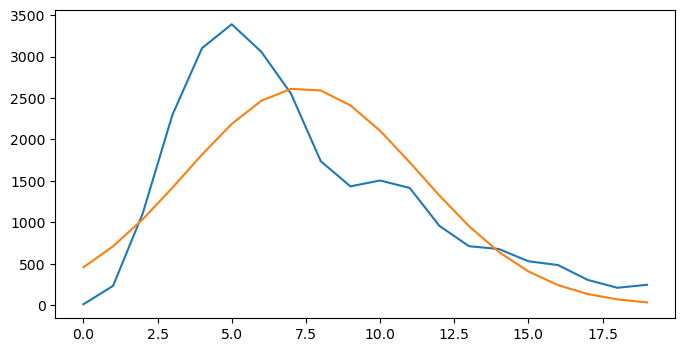

In [34]:
plt.figure(figsize=(8,4))
plt.plot(ch)
plt.show()

In [36]:
ch['exp_mod'] = np.sum(ch['obs'])/np.sum(ch['exp'])*ch['exp']

In [38]:
ch.sum()

obs        25969.000000
exp        25351.026918
exp_mod    25969.000000
dtype: float64

In [40]:
chisquare_stat, p_value = stats.chisquare(ch['obs'], ch['exp_mod'])
print('chisquare_stat is : ' + str(chisquare_stat))
print('p_value : ' + str(p_value))

chisquare_stat is : 5989.654731311591
p_value : 0.0


Since p-value <                                                                                                                                                                                                                                               Since p-value < α, we REJECT H0 to conclude that distribution of price is not mormal.                                                                                                                                   